In [2]:
%matplotlib inline
import numpy as np
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, LinearTriInterpolator
from scipy.interpolate import splrep, splev, splprep, interp1d
from scipy.optimize import curve_fit
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from decimal import Decimal
import scipy
from scipy import special
from scipy.integrate import trapz, simps
import I_n_P as P
import norm_module as M
from importlib import reload
plt.style.use('ggplot')
path = 'C:\\WINDOWS\\Fonts\\BOOKOS.TTF'
prop = fm.FontProperties(fname=path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}',
          r'\usepackage{xfrac}']

In [3]:
reload(M)

<module 'norm_module' from 'C:\\Users\\giannis\\Desktop\\Python_scrpts\\norm_module.py'>

# New Normal Fluxes

In [4]:
exb, par, R, psi = M.particle_read()

In [5]:
mag, R_m, psi_m = M.magnetic_norm_read()

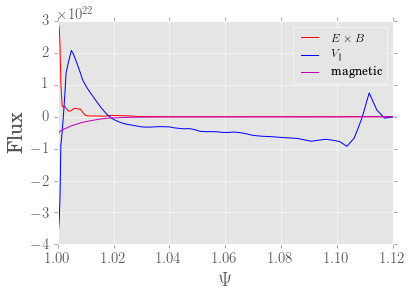

In [6]:
'''HFS Normal Fluxes X-point'''
plt.plot(psi[0:79],exb[0:79],'r',label=r'$E\times B$')
plt.plot(psi[0:79],par[0:79],'b',label=r'$V_{\parallel}$')
plt.plot(psi_m[0:79],mag[0:79],'m',label=r'magnetic')
plt.axvline(x=1.0, color='k',linestyle='--')
plt.xlabel(r'$\Psi$')
plt.ylabel('Flux')
plt.xlim(1.00,1.12)
plt.legend()
plt.show()

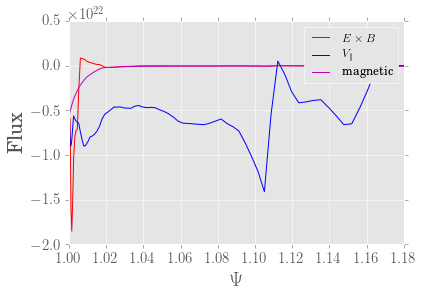

In [7]:
'''LFS Normal Fluxes X-point'''
plt.plot(psi[79:],exb[79:],'r',label=r'$E\times B$')
plt.plot(psi[79:],par[79:],'b',label=r'$V_{\parallel}$')
plt.plot(psi_m[79:],mag[79:],'m',label=r'magnetic')
#plt.axvline(x=1.0, color='k',linestyle='--')
plt.xlim(1.00,1.18)
plt.xlabel(r'$\Psi$')
plt.ylabel('Flux')
plt.legend()
plt.show()

84


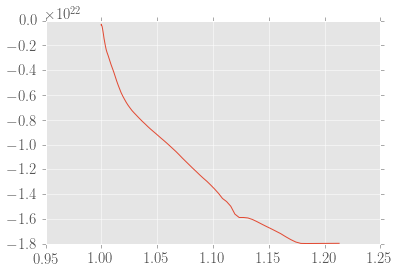

In [8]:
run = M.running_total(par[79:],psi[79:],R[79:])
print(len(run))
plt.plot(psi[82:],run)
plt.show()

In [9]:
run_interp = M.psi_interp(psi[82:],run)
psi_list = [x for x in np.arange(1.0,psi[-1],0.001)]

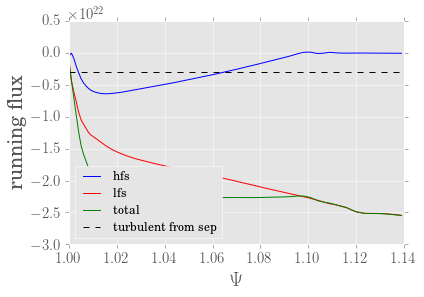

In [10]:
'''HFS parallel'''
run_hfs_par = M.running_total(par[0:79],psi[0:79],R[0:79])
run_hfs_par_interp = M.psi_interp(psi[3:79],run_hfs_par)
'''HFS exb'''
run_hfs_exb = M.running_total(exb[0:79],psi[0:79],R[0:79])
run_hfs_exb_interp = M.psi_interp(psi[3:79],run_hfs_exb)
'''HFS mag'''
run_hfs_mag = M.running_total(mag[0:79],psi_m[0:79],R_m[0:79])
run_hfs_mag_interp = M.psi_interp(psi_m[3:79],run_hfs_mag)

'''LFS parallel'''
run_lfs_par = M.running_total(par[79:],psi[79:],R[79:])
run_lfs_par_interp = M.psi_interp(psi[82:],run_lfs_par)
'''LFS exb'''
run_lfs_exb = M.running_total(exb[79:],psi[79:],R[79:])
run_lfs_exb_interp = M.psi_interp(psi[82:],run_lfs_exb)
'''LFS mag'''
run_lfs_mag = M.running_total(mag[79:],psi_m[79:],R_m[79:])
run_lfs_mag_interp = M.psi_interp(psi_m[82:],run_lfs_mag)

'''lists of numbers'''
psi_list = [x for x in np.arange(1.0,1.14,0.001)]
y_hfs_par = [run_hfs_par_interp(x) for x in psi_list]
y_lfs_par = [run_lfs_par_interp(x) for x in psi_list]
y_hfs_exb = [run_hfs_exb_interp(x) for x in psi_list]
y_lfs_exb = [run_lfs_exb_interp(x) for x in psi_list]
y_hfs_mag = [run_hfs_mag_interp(x) for x in psi_list]
y_lfs_mag = [run_lfs_mag_interp(x) for x in psi_list]
'''totals'''
y_hfs_tot = [a+b+c for a,b,c in zip(y_hfs_par,y_hfs_exb,y_hfs_mag)]
y_lfs_tot = [a+b+c for a,b,c in zip(y_lfs_par,y_lfs_exb,y_lfs_mag)]
y_tot = [a+b for a,b in zip(y_hfs_tot,y_lfs_tot)]
'''plots'''
plt.plot(psi_list,y_hfs_tot,'b',label='hfs')
plt.plot(psi_list,y_lfs_tot,'r',label='lfs')
plt.plot(psi_list,y_tot,'g',label='total')
plt.axhline(y=-3.02e21,color='k',linestyle='--',label='turbulent from sep')
plt.legend(loc=3)
plt.xlabel('$\Psi$')
plt.ylabel('running flux')
plt.show()

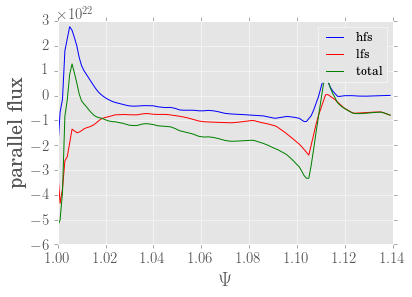

In [11]:
'''Total Fluxes'''
'''R-interpolation'''
R_hfs_interp = M.psi_interp(psi[0:79],R[0:79])
R_lfs_interp = M.psi_interp(psi[79:],R[79:])
'''HFS'''
hfs_par_interp = M.psi_interp(psi[0:79],par[0:79])
hfs_exb_interp = M.psi_interp(psi[0:79],exb[0:79])
hfs_mag_interp = M.psi_interp(psi_m[0:79],mag[0:79])
'''LFS'''
lfs_par_interp = M.psi_interp(psi[79:],par[79:])
lfs_exb_interp = M.psi_interp(psi[79:],exb[79:])
lfs_mag_interp = M.psi_interp(psi_m[79:],mag[79:])
'''lists of numbers'''
y_hfs_par_flux = [hfs_par_interp(x) for x in psi_list]
y_lfs_par_flux = [lfs_par_interp(x) for x in psi_list]
y_hfs_exb_flux = [hfs_exb_interp(x) for x in psi_list]
y_lfs_exb_flux = [lfs_exb_interp(x) for x in psi_list]
y_hfs_mag_flux = [hfs_mag_interp(x) for x in psi_list]
y_lfs_mag_flux = [lfs_mag_interp(x) for x in psi_list]
R_hfs = [R_hfs_interp(x) for x in psi_list]
R_lfs = [R_lfs_interp(x) for x in psi_list]
'''R-weighted values'''
y_hfs_par_flux_R = [a*b for a,b in zip(y_hfs_par_flux, R_hfs)]
y_hfs_exb_flux_R = [a*b for a,b in zip(y_hfs_exb_flux, R_hfs)]
y_hfs_mag_flux_R = [a*b for a,b in zip(y_hfs_mag_flux, R_hfs)]
y_lfs_par_flux_R = [a*b for a,b in zip(y_lfs_par_flux, R_lfs)]
y_lfs_exb_flux_R = [a*b for a,b in zip(y_lfs_exb_flux, R_lfs)]
y_lfs_mag_flux_R = [a*b for a,b in zip(y_lfs_mag_flux, R_lfs)]
'''totals'''
hfs_flux_tot = [a+b+c for a,b,c in zip(y_hfs_par_flux_R,y_hfs_exb_flux_R,y_hfs_mag_flux_R)]
lfs_flux_tot = [a+b+c for a,b,c in zip(y_lfs_par_flux_R,y_lfs_exb_flux_R,y_lfs_mag_flux_R)]
flux_tot = [a+b for a,b in zip(hfs_flux_tot,lfs_flux_tot)]
'''plots'''
plt.plot(psi_list,hfs_flux_tot,'b',label='hfs')
plt.plot(psi_list,lfs_flux_tot,'r',label='lfs')
plt.plot(psi_list,flux_tot,'g',label='total')
plt.legend()
plt.xlabel('$\Psi$')
plt.ylabel('parallel flux')
plt.show()

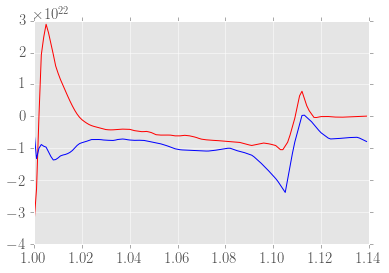

In [12]:
plt.plot(psi_list, y_hfs_par_flux_R,'r')
plt.plot(psi_list, y_lfs_par_flux_R,'b')
plt.show()

# Heat Fluxes

In [13]:
i_exb, i_par = M.ion_heat_read()
e_exb, e_par = M.el_heat_read()
e_mag = M.e_magnetic_heat_read()
i_mag = M.i_magnetic_heat_read()

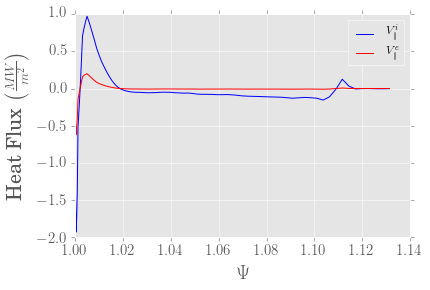

In [14]:
'''HFS Normal Heat Fluxes X-point'''
fig,ax = plt.subplots()
#plt.plot(psi[0:79],i_exb[0:79],'y',label=r'$E\times B^i$')
ax.plot(psi[0:79],i_par[0:79],'b',label=r'$V^i_{\parallel}$')
#plt.plot(psi[0:79],e_exb[0:79],'m',label=r'$E\times B^e$')
ax.plot(psi[0:79],e_par[0:79],'r',label=r'$V^e_{\parallel}$')
#plt.plot(psi_m[0:79],e_mag[0:79],'g',label=r'magnetic$^e$')
plt.axvline(x=1.0, color='k',linestyle='--')
ax.set_xlabel(r'$\Psi$')
ax.set_ylabel(r'Heat Flux $\left(\frac{MW}{m^2}\right)$')
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
plt.legend()
plt.show()

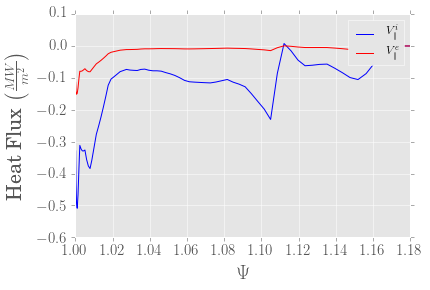

In [15]:
'''LFS Normal Heat Fluxes X-point'''
#plt.plot(psi[79:],i_exb[79:],'y',label=r'$E\times B^i$')
plt.plot(psi[84:],i_par[84:],'b',label=r'$V^i_{\parallel}$')
#plt.plot(psi[79:],e_exb[79:],'m',label=r'$E\times B^e$')
plt.plot(psi[84:],e_par[84:],'r',label=r'$V^e_{\parallel}$')
#plt.plot(psi_m[79:],e_mag[79:],'g',label=r'magnetic$^e$')
#plt.axvline(x=1.0, color='k',linestyle='--')
plt.xlim(1.00,1.18)
plt.xlabel(r'$\Psi$')
plt.ylabel(r'Heat Flux $\left(\frac{MW}{m^2}\right)$')
plt.legend()
plt.show()

In [16]:
psi[84]

1.00017195841